# Machine Learning Logistic Regression

In [277]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as opt
plt.style.use('seaborn-whitegrid')

In [278]:
data = np.loadtxt("data/ex2data1.txt", delimiter=',')

In [279]:
X = data[:,[0,1]]
y = data[:, 2]
# y = data[:, 2][np.newaxis].T

#### Visualizing the data

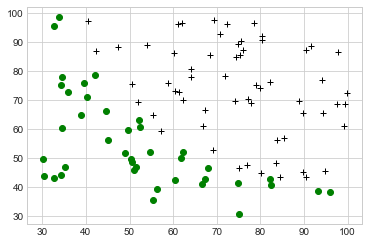

In [280]:
plt.plot(X[(y==1).nonzero()[0],0], X[(y==1).nonzero()[0],1], 'k+')
plt.plot(X[(y==0).nonzero()[0],0], X[(y==0).nonzero()[0],1], 'ko',color="green")
plt.show()

#### Sigmoid Function

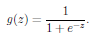

In [281]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

#### Cost function and gradient
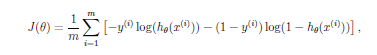
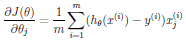

In [282]:
def costFunction(theta, X, y, return_grad=False):
    m  = len(y)
#     theta = theta.reshape((n,1))
#     z = X @ theta
#     h = sigmoid(z)
#     J = (1/m) * np.sum(((-y)*np.log(h)) - ((1-y)*(np.log(1-h))))
#     grad = (1/m)* X.T @ (h-y)
    one = y * np.transpose(np.log( sigmoid( np.dot(X,theta) ) ))
    two = (1-y) * np.transpose(np.log( 1 - sigmoid( np.dot(X,theta) ) ))
    J = -(1./m)*(one+two).sum()
    
    grad = (1./m) * np.dot(sigmoid( np.dot(X,theta) ).T - y, X).T

    if return_grad == True:
        return J, np.transpose(grad)
    elif return_grad == False:
        return J # for use in fmin/fmin_bfgs optimization function

In [283]:
(m,n) = X.shape
X = np.hstack((np.ones((m,1)),X))
# X_padded = np.column_stack((np.ones((m,1)), X)) 

In [284]:
initial_theta = np.zeros(n+1)
(cost, grad) = costFunction(initial_theta, X, y, True)
print(cost, grad)

0.6931471805599453 [ -0.1        -12.00921659 -11.26284221]


In [285]:
test_theta = np.array([-24, 0.2, 0.2])
(cost, grad) = costFunction(test_theta, X, y, True)
print(cost, grad)

0.21833019382659774 [0.04290299 2.56623412 2.64679737]


##### Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

##### Run fminunc to obtain the optimal theta This function will return theta and the cost.
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial theta, options);

In [295]:
initial_theta = np.zeros((n+1,1))
myargs=(X, y)

In [297]:
theta = opt.fmin(costFunction, x0=initial_theta, args=myargs)
theta, cost_at_theta, _, _, _, _, _ = opt.fmin_bfgs(costFunction, 
                                                   x0=theta, args=myargs,
                                                    full_output=True)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 1
         Function evaluations: 12
         Gradient evaluations: 3


In [299]:
(cost, grad) = costFunction(theta, X, y, True)
print(cost, grad)

0.20349770158972494 [-2.35876134e-08 -4.09400750e-06 -7.86955589e-08]


In [300]:
# Print theta to screen
print('Cost at theta found by fmin: {:f}'.format(cost_at_theta))
print('theta:'),
print(theta)

Cost at theta found by fmin: 0.203498
theta:
[-25.16130062   0.20623139   0.20147139]


#### Evaluating and Plot the result

In [225]:
def plotData(X, y):
#   PLOTDATA Plots the data points X and y into a new figure 
#   PLOTDATA(x,y) plots the data points with + for the positive examples
#   and o for the negative examples. X is assumed to be a Mx2 matrix.
    import matplotlib.pyplot as plt
    import numpy as np

    p1 = plt.plot(X[(y==1).nonzero()[0],0], X[(y==1).nonzero()[0],1],  '+', color='k')[0]
    p2 = plt.plot(X[(y==0).nonzero()[0],0], X[(y==0).nonzero()[0],1], 'o', color='y')[0]
    return plt, p1, p2

In [226]:
def plotDecisionBoundary(theta, X, y):
#PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
#the decision boundary defined by theta
#   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
#   positive examples and o for the negative examples. X is assumed to be 
#   a either 
#   1) Mx3 matrix, where the first column is an all-ones column for the 
#      intercept.
#   2) MxN, N>3 matrix, where the first column is all-ones    
    import matplotlib.pyplot as plt
    import numpy as np
    # Plot Data
    fig = plt.figure()
    plt, p1, p2 = plotData(X[:, 1:3], y)
#     plt.hold(True)
    
    if X.shape[1] <= 3:
        aa = 0
#         Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([min(X[:,1])-2, max(X[:,1])+2])
        
        # Calculate the decision boundary line
        plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])
        
        # Plot, and adjust axes for better viewing
        p3 = plt.plot(plot_x, plot_y)
        
        # Legend, specific for the exercise
        plt.legend((p1, p2, p3[0]),
                   ('Admitted','Not Admitted', 'Decision Boundary'),
                  numpoints=1, handlelength=0.5)
        plt.axis([30, 100, 30, 100])
        plt.show()
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v) ))
        
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = np.dot(mapFeature(np.array([u[i]]), 
                                           np.array([v[j]])), theta)
        z = np.transpose(z) # important to transpose z before calling contour
        
        # Plot z = 0
        # Notice you need to specify the level 0
        # we get collections[0] so that we can display a legend properly
        p3 = plt.contour(u, v, z, levels=[0], linewidth=2).collections[0]
        
        # Legend, specific for the exercise
        plt.legend((p1, p2, p3), ('y = 1', 'y = 0', 'Decision Boundary'), 
                   numpoints=1, handlelength=1)
        
        plt.show()
        
#     plt.hold(False) #prevents further drawing on plot

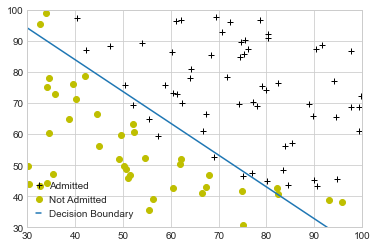

In [301]:
plotDecisionBoundary(theta, X, y)

#### Predict and Accuracies

In [246]:
def predict(theta, X):
    return sigmoid(X@theta) >= 0.5

In [303]:
prob = sigmoid(np.dot(np.array([1,45,85]),theta))
print('For a student with scores 45 and 85, we predict an admission probability of {:f}'.format(prob))

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: {:f}'.format(np.mean(p == y) * 100))


For a student with scores 45 and 85, we predict an admission probability of 0.776291
Train Accuracy: 89.000000


## Regularized logistic regression

In [84]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [85]:
data = np.loadtxt("data/ex2data2.txt", delimiter=',')

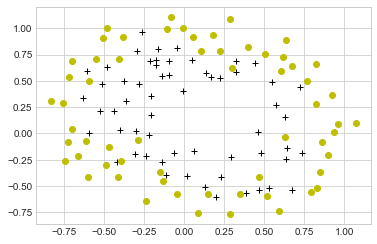

In [95]:
X = data[:, [0,1]]
y = data[:, 2]
# y = data[:, 2][np.newaxis].T
plotData(X,y)
plt.show()

#### Feature mapping
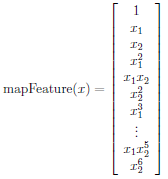

In [100]:
def mapFeature(X1, X2):
# MAPFEATURE Feature mapping function to polynomial features
#
#   MAPFEATURE(X1, X2) maps the two input features
#   to quadratic features used in the regularization exercise.
#
#   Returns a new feature array with more features, comprising of 
#   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
#   for a total of 1 + 2 + ... + (degree+1) = ((degree+1) * (degree+2)) / 2 columns
#
#   Inputs X1, X2 must be the same size
#
    degree = 6
    # could also use ((degree+1) * (degree+2)) / 2 instead of sum
    out = np.ones((X1.shape[0], sum(range(degree+2)) ))
    curr_column = 1
    for i in range(1,degree+1):
        for j in range(i+1):
            out[:, curr_column] = np.power(X1, i-j) * np.power(X2, j)
            curr_column += 1
    return out

In [98]:
# Add Polynomial Features
X = mapFeature(X[:,0], X[:,1])

In [162]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1],1))
y = data[:, 2]

In [163]:
# Set regularization parameter lambda to 1
lambda_ = 1

In [159]:
def sigmoid(z):
    return 1/(1+ np.exp(-z)) 

#### Cost function and gradient Regularized
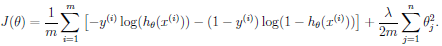
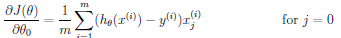
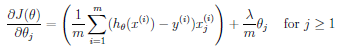

In [164]:
def costFunctionReg(theta, X, y, lambda_, return_grad=False):
    m = len(y)
    grad = np.zeros(theta.shape)
#     h = sigmoid(X@theta)
#     J = (1/m) * np.sum(((-y)*np.log(h)) - ((1-y)*(np.log(1-h))))\
#     + (lambda_ / (2*m))*(theta[1:].T @ theta[1:])
#     grad[0] = ((1/m)* X.T @ (h-y))[0]
#     grad[1:] = (((1/m)* X.T @ (h-y)) + ((lambda_ / m)*theta))[1:]
    one = y * np.transpose(np.log( sigmoid( np.dot(X,theta) ) ))
    two = (1-y) * np.transpose(np.log( 1 - sigmoid( np.dot(X,theta) ) ))
    reg = ( float(lambda_reg) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    J = -(1./m)*(one+two).sum() + reg

    # applies to j = 1,2,...,n - NOT to j = 0
    grad = (1./m) * np.dot(sigmoid( np.dot(X,theta) ).T - y, X).T + ( float(lambda_reg) / m )*theta

    # the case of j = 0 (recall that grad is a n+1 vector)
    # since we already have the whole vectorized version, we use that
    grad_no_regularization = (1./m) * np.dot(sigmoid( np.dot(X,theta) ).T - y, X).T

    # and then assign only the first element of grad_no_regularization to grad
    grad[0] = grad_no_regularization[0]
    if return_grad == True:
        return J, grad.flatten()
    elif return_grad == False:
        return J 
    

In [165]:
(cost, grad) = costFunctionReg(initial_theta, X, y, lambda_, True)
print(cost, grad)

0.6931471805599454 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [166]:
test_theta = np.ones((X.shape[1],1))
(cost, grad) = costFunctionReg(test_theta, X, y, 10, True)
print(cost, grad)

2.134848314665857 [0.34604507 0.08508073 0.11852457 0.1505916  0.01591449 0.16811439
 0.06712094 0.03217053 0.02604321 0.10719727 0.09725885 0.01098433
 0.04195657 0.00957212 0.12367776 0.05895534 0.01870409 0.01729323
 0.02352665 0.01513039 0.09858123 0.07328323 0.01051447 0.02270567
 0.00904832 0.02563548 0.00823079 0.10601204]


In [167]:
import scipy.optimize as opt
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])
# Set regularization parameter lambda to 1
lambda_reg = 1
# Set Options
myargs=(X, y, lambda_reg)
result = opt.fmin_bfgs(costFunctionReg, 
                     x0=initial_theta, args=myargs)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1392
         Gradient evaluations: 48


In [170]:
theta_result = result
(cost, grad) = costFunctionReg(theta_result, X, y, lambda_, True)
print(cost, grad)

0.5290027422858311 [-7.42723211e-07  3.52682317e-06 -3.89862588e-07  8.22035800e-06
 -2.34419901e-06 -3.43893312e-06 -3.37494641e-06  3.97730375e-06
  2.09917595e-06  2.59913406e-06 -2.09256132e-06 -3.11131851e-06
 -3.79232881e-06  6.31643843e-07 -4.86402372e-07 -5.79473686e-06
  2.86160120e-06 -2.38501056e-06 -1.62636189e-07  1.20392225e-06
  2.20316886e-06 -5.24899058e-06 -1.51642881e-06 -1.79240054e-06
 -1.19266770e-06 -1.70105148e-06  9.96582060e-08  4.05004174e-07]


In [201]:
def plotDecisionBoundary(theta, X, y):
#PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
#the decision boundary defined by theta
#   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
#   positive examples and o for the negative examples. X is assumed to be 
#   a either 
#   1) Mx3 matrix, where the first column is an all-ones column for the 
#      intercept.
#   2) MxN, N>3 matrix, where the first column is all-ones    
    import matplotlib.pyplot as plt
    import numpy as np
    # Plot Data
    fig = plt.figure()
    plt, p1, p2 = plotData(X[:, 1:3], y)
#     plt.hold(True)
    
    if X.shape[1] <= 3:
        aa = 0
#         Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([min(X[:,1])-2, max(X[:,1])+2])
        
        # Calculate the decision boundary line
        plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])
        
        # Plot, and adjust axes for better viewing
        p3 = plt.plot(plot_x, plot_y)
        
        # Legend, specific for the exercise
        plt.legend((p1, p2, p3[0]),
                   ('Admitted','Not Admitted', 'Decision Boundary'),
                  numpoints=1, handlelength=0.5)
        plt.axis([30, 100, 30, 100])
        plt.show()
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v) ))
        
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = np.dot(mapFeature(np.array([u[i]]), 
                                           np.array([v[j]])), theta)
        z = np.transpose(z) # important to transpose z before calling contour
        
        # Plot z = 0
        # Notice you need to specify the level 0
        # we get collections[0] so that we can display a legend properly
#         p3 = plt.contour(u, v, z, levels=[0], linewidth=2).collections[0]
        p3 = plt.contour(u, v, z).collections[0]
        
        # Legend, specific for the exercise
        plt.legend((p1, p2, p3), ('y = 1', 'y = 0', 'Decision Boundary'), 
                   numpoints=1, handlelength=0)
        plt.xlabel('Microchip Test 1')
        plt.ylabel('Microchip Test 2')
        plt.title('lambda = {:f}'.format(lambda_reg))
        plt.show()

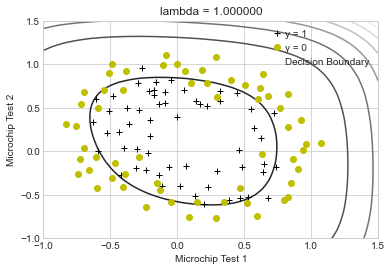

In [202]:
# # Labels, title and Legend
plotDecisionBoundary(theta_result, X, y)

In [206]:
def predict(theta, X):
    return sigmoid(X@theta) >= 0.5

#### Train Accuracy

In [208]:
p = predict(theta_result, X)
accuracy = np.mean(p == y)*100
print(accuracy)

83.05084745762711
